In [4]:
import numpy as np
import numpy.linalg as LA
from scipy.integrate import quad
from matplotlib import pyplot as plt
import sympy as sm
from mpl_toolkits.mplot3d import Axes3D

# <center> Numerical Analysis III Algorithms

## Algebraic Eigenvalue Problem
###  Symmetric Eigenvalue Probelm
* * Jacobi Method
* * Givens Method
* * House Holders Method

### <center> Jacobi Method

In [5]:
def arg_max_off_diag(A):
    """
        gets the coordinates of the largest off-diagonal element

        Inputs:
            A : the matrix where the arg_max will be found

        Outputs:
            i : row of the max index
            j : coloumn of the max index
    """

    n = len(A)
    row = 0
    col = 0
    max_value = 0

    for i in range(0,n,1):
        for j in range(i+1,n,1):

            if abs(A[i][j]) > max_value:
                max_value = abs(A[i][j])
                row = i
                col = j


    return row,col,max_value

In [6]:
def Jacobi(A,tol,log):
    """
        Determines the eigenvalues and eigenvectors of a symmetric square matrix

        Inputs:
            A    : the matrix whos eigenpair shall be determined
        Outputs:
            w    : the eigenvalues
            v    : the eigenvectors
    """

    #getting information on matrix#
    m = len(A)
    A_old = np.copy(A)
    P = np.eye(m)

    while abs(arg_max_off_diag(A_old)[2]) >= tol:
        #getting coordinates of max element#
        i,j,value = arg_max_off_diag(A_old)

        R = np.eye(m)

        #getting angle#
        if A_old[i,i] == A_old[j,j] and A_old[i,j]>0:
            theta = np.pi/4
        elif  A_old[i,i] == A_old[j,j] :
            theta = - np.pi/4
        else:
            theta = 0.5 * np.arctan((2*A_old[i,j])/(A_old[j,j]-A_old[i,i]))


        # if A_old[i,i] == A_old[j,j] :
        #     theta = np.pi/4
        # else:
        #     theta = 0.5 * np.arctan((2*A_old[i,j])/(A_old[j,j]-A_old[i,i]))


        #updating rotational matrix#
        R[i,i] = np.cos(theta)
        R[j,j] = np.cos(theta)
        R[i,j] = np.sin(theta)
        R[j,i] = -np.sin(theta)


        #updating eigenvector matrix#
        P = P @ R

        #calculating new A#
        A_new = R.T @ A_old @ R

        if log == True:
            print('\n==================================================================================================\n','matrix A \n',A_old,'\n Max indices',"{} ; {} \n".format(i,j),'\n Theta: {} \n'.format(theta),'\n R Matrix \n',R,'\n new Matrix \n',A_new,'\n==================================================================================================\n')

        A_old = A_new

    eign_values = []

    for i in range(m):
        eign_values.append(A_old[i,i])

    return eign_values,P




### <center> Givens Method

In [ ]:
def givens_method(A,log):
    """
        create a tri_diagonal Matrix from A
    """

    n = len(A)
    A_old = np.copy(A)
    A_new = np.copy(A)

    Q = np.eye(n)

    for i in range(0,n-1,1):

        for j in range(i+2,n,1):
            k = i+1

            if A_old[i,i+1]!= 0 :
                angle = - np.arctan(A_old[i,j]/A_old[i,k])
            else:
                angle = - np.pi/2


            R = np.eye(n)
            R[k,k] = np.cos(angle)
            R[j,j] = np.cos(angle)
            R[k,j] = np.sin(angle)
            R[j,k] = -np.sin(angle)

            Q = Q @ R

            A_new = R.T @ A_old @ R

            if log == True:
                print('\n============================================\n','\n row {};col{} \n'.format(i,j),"\n A_old: \n",A_old.round(13),'\n-----------------\n',"Angle: \n",angle,'\n--------------------------------\n',"R: \n",R.round(13),'\n----------------\n',"Anew : \n",A_new.round(13),'\n=============================================\n')
            A_old = A_new

    A_old = A_old.round(13)
    return A_old

### <center> Householders Method </center>

In [ ]:
def get_P_matrix(n,H):

    X = np.eye(n)
    offset = n - len(H)

    for i in range(offset,n,1):
        for j in range(offset,n,1):
            X[i,j] = H[i-offset,j-offset]

    return X


In [ ]:
def householders(A_0,log):

    n = len(A_0)
    A = np.copy(A_0)
    Q = np.eye(n)

    for i in range(1,n-1,1):

        j = i-1

#########getting vector x#############################################
        x = A[i::,j]
######################################################################

#########getting sign#################################################
        sign = 1
        if x[0] > 0:
            sign = -1
######################################################################

########calculating alpha#############################################
        alpha = sign * np.linalg.norm(x,2)
######################################################################

#######calculating u#################################################
        u = np.copy(x)
        u[0] = u[0] - alpha
#####################################################################

######calculating w#################################################
        w = (1/np.linalg.norm(u,2))*u
        w = np.reshape(w,(len(w),1))
####################################################################

######calculating H ################################################
        size = len(w)
        H = np.eye(size) - 2*(w @ w.T)
####################################################################

######calculating P and getting new A ##############################
        P = get_P_matrix(n,H)
        A_new = P @ A @ P
####################################################################

        Q = Q @ P

        if log == True:
                print("\n=============================================================\n","index : ({},{})".format(i,j),"\n---------------------------\n","X : \n",x,"\n---------------------------\n","alpha :",alpha,"\n---------------------------\n","u: \n",u,"\n---------------------------\n","w: \n",w,"\n---------------------------\n","H: \n",H,"\n---------------------------\n","A: \n",A.round(13),"\n---------------------------\n","A_new: \n",A_new.round(13),"\n=============================================================\n")

        A = A_new

    A = A.round(13)
    return A,Q

#### <center> QR method

In [ ]:
def get_max_off_diag(A):
    n = len(A)

    value = 0

    for i in range(0,n,1):
        for j in range(0,n,1):
            if i!=j and abs(A[i][j])>value:
                value = abs(A[i][j])

    return value

In [ ]:
def QR(A_0,tol,log):

    A = np.copy(A_0)
    n = len(A)

    iteration = 0
    eigen_vec = np.eye(n)

    while get_max_off_diag(A)>tol:

        n = len(A)
        Q = np.eye(n)

        for i in range(0,n-1,1):

            x = A[i::,i]
            sign = 1

            if x[0] > 0:
                sign = -1

            alpha = sign * np.linalg.norm(x,2)
            u = np.copy(x)
            temp = u[0] - alpha
            u[0] = temp
            w = (1/np.linalg.norm(u,2))*u
            w = np.reshape(w,(len(w),1))
            size = len(w)
            H = np.eye(size) - 2*(w @ w.T)
            P = get_P_matrix(n,H)

            A= P @ A
            #print("\n iteration{}".format(i),"\n===============================\n",'alpha:\n',alpha,'\n------------------------\n','u:\n',u,'\n------------------------\n','w:\n',w,'\n------------------------\n','\n P\n:',P,'\n------------------------\n','\n A:\n',A,'\n------------------------\n','\n Anew: \n',A_new,"\n===============================\n")
            Q = Q @ P


        A_new = A @ Q
        if log == True:
            print("iteration : {} \n".format(iteration),"\n==============================================\n",'\n--------------------\n','A: \n',A.round(13),'\n--------------------\n','Q: \n',Q.round(13),'\n--------------------\n','Anew: \n',A_new.round(13),'\n--------------------\n',"\n==============================================\n")
        A = A_new
        eigen_vec = eigen_vec @ Q
        iteration+=1


    eign_vals = []

    for i in range(len(A)):
        eign_vals.append(A[i,i])

    return eign_vals,eigen_vec


#### <center>Jacobi Tests </center>

In [7]:
##TEST 1##
A = np.array([(1.0,0.0,2.0),
              (0.0,2.0,1.0),
              (2.0,1.0,1.0)])

u,v = Jacobi(A,tol=0.0000001,log=True)


 matrix A 
 [[1. 0. 2.]
 [0. 2. 1.]
 [2. 1. 1.]] 
 Max indices 0 ; 2 
 
 Theta: 0.7853981633974483 
 
 R Matrix 
 [[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]] 
 new Matrix 
 [[-1.00000000e+00 -7.07106781e-01  3.13396163e-16]
 [-7.07106781e-01  2.00000000e+00  7.07106781e-01]
 [ 4.87998083e-16  7.07106781e-01  3.00000000e+00]] 


 matrix A 
 [[-1.00000000e+00 -7.07106781e-01  3.13396163e-16]
 [-7.07106781e-01  2.00000000e+00  7.07106781e-01]
 [ 4.87998083e-16  7.07106781e-01  3.00000000e+00]] 
 Max indices 1 ; 2 
 
 Theta: 0.47765830906225465 
 
 R Matrix 
 [[ 1.          0.          0.        ]
 [ 0.          0.88807383  0.45970084]
 [ 0.         -0.45970084  0.88807383]] 
 new Matrix 
 [[-1.00000000e+00 -6.27963030e-01 -3.25057584e-01]
 [-6.27963030e-01  1.63397460e+00  9.13462642e-17]
 [-3.25057584e-01 -1.12689979e-17  3.36602540e+00]] 


 matrix A 
 [[-1.00000000e+00 -6.27963030e-01 -3.25057584e-01]
 [-6.27963

In [ ]:
v

array([[ 0.91303765,  0.10883982,  0.39308542],
       [-0.35084705,  0.70106943,  0.62081237],
       [-0.20801106, -0.70473792,  0.67828892]])

In [ ]:
np.linalg.eig(A)[0]

array([12.64019972, -1.0640829 , -5.57611682])

In [ ]:
np.linalg.eig(A)[1]

array([[ 0.39308542,  0.91303765, -0.10883982],
       [ 0.62081237, -0.35084705, -0.70106943],
       [ 0.67828892, -0.20801106,  0.70473792]])

In [ ]:
A = np.array([(2,2,2),
              (2,1,1),
              (2,1,2)])
u,v = Jacobi(A,tol=1e-5,log=False)

In [ ]:
v

array([[ 0.669606  , -0.69625349, -0.25857086],
       [ 0.4656103 ,  0.66475357, -0.5842172 ],
       [ 0.57864917,  0.27080208,  0.76930577]])

In [ ]:
#TEST 2#
A = np.array([(2,2,2),
              (2,1,1),
              (3,1,2)])
u,v = Jacobi(A,tol=0.000001,log=False)

In [ ]:
u

[5.480786632576465, -0.890547192772059, 0.4097605601955966]

In [ ]:
v

array([[ 0.71779573, -0.66512984, -0.2058436 ],
       [ 0.44068834,  0.66290174, -0.60527273],
       [ 0.53903904,  0.3437493 ,  0.768943  ]])

In [ ]:
np.linalg.eig(A)[0]

array([ 5.48078662, -0.89054719,  0.40976057])

In [ ]:
np.linalg.eig(A)[1]

array([[ 0.62197308,  0.69600686, -0.2058436 ],
       [ 0.42446898, -0.43354624, -0.60527271],
       [ 0.6580088 , -0.5723741 ,  0.76894301]])

In [ ]:
#TEST 3#
A = np.array([(3,2,1,2),(2,-1,1,2),(1,1,4,3),(2,2,3,1)])
u,v = Jacobi(A,tol=0.000001,log=False)

In [ ]:
u

[2.6393624606847323, -2.42869978528273, 7.700921819076125, -0.9115844944781266]

In [ ]:
v

array([[ 0.73395289, -0.13830106,  0.4852247 , -0.45468997],
       [ 0.21336008,  0.83002382,  0.30384789,  0.41619033],
       [-0.64438954,  0.136376  ,  0.63431715, -0.40472888],
       [-0.02351079, -0.52281437,  0.51949515,  0.67545331]])

In [ ]:
np.linalg.eig(A)[0]

array([ 7.70092182,  2.63936246, -0.91158449, -2.42869979])

In [ ]:
np.linalg.eig(A)[1]

array([[ 0.48522468,  0.73395289,  0.45468999,  0.13830105],
       [ 0.3038479 ,  0.21336008, -0.41619033, -0.83002382],
       [ 0.63431713, -0.64438954,  0.4047289 , -0.136376  ],
       [ 0.51949518, -0.02351079, -0.67545328,  0.52281437]])

In [ ]:
#TEST 4#
A = np.array([(2,2,2),
              (2,1,1),
              (2,1,2)])
u,v = Jacobi(A,tol=0.000001,log=False)

In [ ]:
u

[5.119026675525916, -0.6873995617361738, 0.5683728862102592]

In [ ]:
v

array([[ 0.669606  , -0.69625349, -0.25857086],
       [ 0.4656103 ,  0.66475357, -0.5842172 ],
       [ 0.57864917,  0.27080208,  0.76930577]])

In [ ]:
u,v = np.linalg.eig(A)

In [ ]:
u

array([ 5.11902668, -0.68739956,  0.56837289])

In [ ]:
v

array([[-0.66960599, -0.69625349, -0.25857088],
       [-0.46561028,  0.66475357, -0.58421721],
       [-0.57864919,  0.27080208,  0.76930576]])

In [ ]:
A = np.array([(4.0,-1.0,-2.0),(-1.0,3.0,3.0),(-2.0,3.0,1.0)])
u,v = Jacobi(A,tol=1e-3,log=True)


 matrix A 
 [[ 4. -1. -2.]
 [-1.  3.  3.]
 [-2.  3.  1.]] 
 Max indices 1 ; 2 
 
 Theta: -0.6245228861991272 
 
 R Matrix 
 [[ 1.          0.          0.        ]
 [ 0.          0.81124219 -0.58471028]
 [ 0.          0.58471028  0.81124219]] 
 new Matrix 
 [[ 4.00000000e+00 -1.98066275e+00 -1.03777409e+00]
 [-1.98066275e+00  5.16227766e+00  2.65151011e-16]
 [-1.03777409e+00 -3.99125007e-17 -1.16227766e+00]] 


 matrix A 
 [[ 4.00000000e+00 -1.98066275e+00 -1.03777409e+00]
 [-1.98066275e+00  5.16227766e+00  2.65151011e-16]
 [-1.03777409e+00 -3.99125007e-17 -1.16227766e+00]] 
 Max indices 0 ; 1 
 
 Theta: -0.6426998844177763 
 
 R Matrix 
 [[ 0.80048048 -0.59935883  0.        ]
 [ 0.59935883  0.80048048  0.        ]
 [ 0.          0.          1.        ]] 
 new Matrix 
 [[ 2.51698106e+00 -2.08993426e-16 -8.30717896e-01]
 [ 2.24903261e-17  6.64529660e+00  6.21999060e-01]
 [-8.30717896e-01  6.21999060e-01 -1.16227766e+00]] 


 matrix A 
 [[ 2.51698106e+00 -2.08993426e-16 -8.30717896e-01]


In [ ]:
A = np.array([(1.0,1.0,1.0),(1.0,1.0,0.0),(1.0,0.0,1.0)])
u,v = Jacobi(A, tol=1e-4, log=False)

In [ ]:
u

[-0.4142135619605518, 2.4142135623730945, 0.9999999995874567]

In [ ]:
v

array([[ 7.07106781e-01,  7.07106781e-01, -1.20683864e-05],
       [-5.00012077e-01,  5.00000009e-01, -7.07098235e-01],
       [-4.99987923e-01,  4.99999991e-01,  7.07115327e-01]])

#### <center> Givens Tests </center>

In [ ]:
A = np.array([(1,np.sqrt(2),np.sqrt(2),2),
               (np.sqrt(2),-np.sqrt(2),-1,np.sqrt(2)),
               (np.sqrt(2),-1,np.sqrt(2),np.sqrt(2)),
               (2,np.sqrt(2),np.sqrt(2),-3)])

ans =givens_method(A,log=True)


 
 row 0;col2 
 
 A_old: 
 [[ 1.          1.41421356  1.41421356  2.        ]
 [ 1.41421356 -1.41421356 -1.          1.41421356]
 [ 1.41421356 -1.          1.41421356  1.41421356]
 [ 2.          1.41421356  1.41421356 -3.        ]] 
-----------------
 Angle: 
 -0.7853981633974483 
--------------------------------
 R: 
 [[ 1.          0.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678  0.        ]
 [ 0.          0.70710678  0.70710678  0.        ]
 [ 0.          0.          0.          1.        ]] 
----------------
 Anew : 
 [[ 1.          2.          0.          2.        ]
 [ 2.         -1.          1.41421356  2.        ]
 [ 0.          1.41421356  1.          0.        ]
 [ 2.          2.          0.         -3.        ]] 


 
 row 0;col3 
 
 A_old: 
 [[ 1.          2.          0.          2.        ]
 [ 2.         -1.          1.41421356  2.        ]
 [ 0.          1.41421356  1.          0.        ]
 [ 2.          2.          0.         -3.        ]] 
----

In [ ]:
ans

array([[ 1.        ,  2.82842712, -0.        ,  0.        ],
       [ 2.82842712,  0.        ,  1.41421356, -0.        ],
       [-0.        ,  1.41421356, -0.5       ,  2.5       ],
       [ 0.        ,  0.        ,  2.5       , -2.5       ]])

In [ ]:
QR(A,tol=0.01,log=False)[0]

[-4.4248704256621005,
 3.6529736766052916,
 -2.3919781759865226,
 1.1638749250432716]

In [ ]:
QR(ans,tol=0.01,log=False)[0]

[-4.424870425662082,
 3.652973676605335,
 -2.3919781759865213,
 1.1638749250432718]

#### <center> Householders Tests </center>

In [ ]:
A = np.array([(3,2,1,2),
              (2,-1,1,2),
              (1,1,4,3),
              (2,2,3,1)])
ans = householders(A,log = False)

In [ ]:
ans

array([[ 3.        , -3.        , -0.        ,  0.        ],
       [-3.        ,  4.        ,  3.16227766, -0.        ],
       [-0.        ,  3.16227766,  2.        ,  1.        ],
       [ 0.        , -0.        ,  1.        , -2.        ]])

In [ ]:
A = np.array([[4.0,2.0,2.0],[2.0,-3.0,0.0],[2.0,0.0,3.0]])
ans = householders(A,log = True)


 index : (1,0) 
---------------------------
 X : 
 [2. 2.] 
---------------------------
 alpha : -2.8284271247461903 
---------------------------
 u: 
 [4.82842712 2.        ] 
---------------------------
 w: 
 [[0.92387953]
 [0.38268343]] 
---------------------------
 H: 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] 
---------------------------
 A: 
 [[ 4.  2.  2.]
 [ 2. -3.  0.]
 [ 2.  0.  3.]] 
---------------------------
 A_new: 
 [[ 4.         -2.82842712 -0.        ]
 [-2.82842712  0.         -3.        ]
 [-0.         -3.         -0.        ]] 



In [ ]:
QR(ans,tol=0.01,log=False)[0]

[7.7009218190762025,
 2.6393453310891437,
 -2.4286826556871137,
 -0.9115844944781497]

In [ ]:
QR(ans,tol=0.01,log=False)[1]

array([[ 0.48522468,  0.73420591, -0.13695148, -0.45468999],
       [-0.76033443,  0.08869027, -0.25010233, -0.59285278],
       [-0.42952087,  0.65763061,  0.37877776,  0.48944991],
       [-0.04427629,  0.14351901, -0.88046608,  0.44969032]])

In [ ]:
QR(A,tol=0.01,log=False)[0]

[7.700921819076126,
 2.6393439782672354,
 -2.428681302865233,
 -0.9115844944781375]

In [ ]:
QR(A,tol=0.01,log=False)[1]

array([[ 0.48522468,  0.73421566, -0.13689919, -0.45468999],
       [ 0.3038479 ,  0.21177462,  0.83042975,  0.41619033],
       [ 0.63431713, -0.6446488 ,  0.13514518, -0.4047289 ],
       [ 0.51949518, -0.02251234, -0.52285832,  0.67545328]])

In [ ]:
A = np.array([(12.0,4.0,3.0),(4.0,9.0,3.0),(3.0,3.0,15.0)])
ans = householders(A,log = True)


 index : (1,0) 
---------------------------
 X : 
 [4. 3.] 
---------------------------
 alpha : -5.0 
---------------------------
 u: 
 [9. 3.] 
---------------------------
 w: 
 [[0.9486833 ]
 [0.31622777]] 
---------------------------
 H: 
 [[-0.8 -0.6]
 [-0.6  0.8]] 
---------------------------
 A: 
 [[12.  4.  3.]
 [ 4.  9.  3.]
 [ 3.  3. 15.]] 
---------------------------
 A_new: 
 [[12.   -5.    0.  ]
 [-5.   14.04 -3.72]
 [ 0.   -3.72  9.96]] 



In [ ]:
ans

array([[12.  , -5.  ,  0.  ],
       [-5.  , 14.04, -3.72],
       [ 0.  , -3.72,  9.96]])

In [ ]:
A = np.array([(7.0,2.0,3.0,-1.0),(2.0,8.0,5.0,1.0),(3.0,5.0,12.0,9.0),(-1.0,1.0,9.0,7.0)])
ans,Q = householders(A,log=False)

In [ ]:
ans

array([[ 7.        , -3.74165739,  0.        ,  0.        ],
       [-3.74165739, 10.64285714,  9.13085149, -0.        ],
       [ 0.        ,  9.13085149, 10.59421525,  4.77158058],
       [ 0.        ,  0.        ,  4.77158058,  5.76292761]])

In [ ]:
Q

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.53452248, -0.25506831,  0.80574554],
       [ 0.        , -0.80178373, -0.14844139, -0.57888514],
       [ 0.        ,  0.26726124, -0.95546079, -0.12516436]])

In [ ]:
print(Q.T @ A @ Q)

[[ 7.00000000e+00 -3.74165739e+00  1.11022302e-16  3.88578059e-16]
 [-3.74165739e+00  1.06428571e+01  9.13085149e+00 -1.88169058e-15]
 [ 1.11022302e-16  9.13085149e+00  1.05942153e+01  4.77158058e+00]
 [ 3.88578059e-16 -5.38146318e-16  4.77158058e+00  5.76292761e+00]]


#### <center> QR method Tests

In [ ]:
v

array([[-0.59020967, -0.77264261,  0.23382886],
       [ 0.80702821, -0.57154124,  0.14847923],
       [ 0.01892146,  0.27634036,  0.96087355]])

In [ ]:
A = np.array([(2.0,1.0,0.0),
              (1.0,3.0,1.0),
              (0.0,1.0,4.0)])

u,v = QR(A,tol=1e-6,log=True)

iteration : 0 
 
 
--------------------
 A: 
 [[-2.23606798 -2.23606798 -0.4472136 ]
 [ 0.         -2.44948974 -2.44948974]
 [ 0.          0.          3.28633535]] 
--------------------
 Q: 
 [[-0.89442719  0.40824829  0.18257419]
 [-0.4472136  -0.81649658 -0.36514837]
 [ 0.         -0.40824829  0.91287093]] 
--------------------
 Anew: 
 [[ 3.          1.09544512 -0.        ]
 [ 1.09544512  3.         -1.34164079]
 [-0.         -1.34164079  3.        ]] 
--------------------
 

iteration : 1 
 
 
--------------------
 A: 
 [[-3.19374388 -2.05798302  0.46017899]
 [-0.         -2.78652218  2.54898533]
 [ 0.          0.          2.02259959]] 
--------------------
 Q: 
 [[-0.93933644  0.30062324 -0.16514456]
 [-0.34299717 -0.82329065  0.45226702]
 [ 0.          0.48147501  0.87645982]] 
--------------------
 Anew: 
 [[3.70588235 0.95576922 0.        ]
 [0.95576922 3.52139037 0.97383115]
 [0.         0.97383115 1.77272727]] 
--------------------
 

iteration : 2 
 
 
--------------------
 

In [ ]:
u

[4.732050807568429, 3.000000000000439, 1.267949192431122]

In [ ]:
v

array([[ 0.21132516, -0.57735016,  0.78867513],
       [ 0.57735056, -0.57734998, -0.57735027],
       [ 0.78867484,  0.57735067,  0.21132487]])

In [ ]:
np.linalg.eig(A)[0]

array([1.26794919, 3.        , 4.73205081])

In [ ]:
np.linalg.eig(A)[1]

array([[-0.78867513, -0.57735027,  0.21132487],
       [ 0.57735027, -0.57735027,  0.57735027],
       [-0.21132487,  0.57735027,  0.78867513]])

In [ ]:
A = np.array([(7.0,2.0,3.0,-1.0),(2.0,8.0,5.0,1.0),(3.0,5.0,12.0,9.0),(-1.0,1.0,9.0,7.0)])
B,Q = householders(A, log = False)

In [ ]:
B

array([[ 7.        , -3.74165739,  0.        ,  0.        ],
       [-3.74165739, 10.64285714,  9.13085149, -0.        ],
       [ 0.        ,  9.13085149, 10.59421525,  4.77158058],
       [ 0.        ,  0.        ,  4.77158058,  5.76292761]])

In [ ]:
Q

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.53452248, -0.25506831,  0.80574554],
       [ 0.        , -0.80178373, -0.14844139, -0.57888514],
       [ 0.        ,  0.26726124, -0.95546079, -0.12516436]])

## <center> Singular Value Decomposition

In [ ]:
def sort_eig(eig_values,eig_vectors):
    """
        Sorts the eigenvalues and eigenvectors corresponding to the eigenvectors
    """
    u = np.copy(eig_values)
    v = np.copy(eig_vectors)
    k = len(u)

    for i in range(0,k,1):
        for j in range(i+1,k,1):

            if u[j]>u[i]:
                u_temp = u[i]
                u[i] = u[j]
                u[j] = u_temp

                v_temp = v[:,i]
                v[:,i] = v[:,j]
                v[:,j] = v_temp

    return u,v

In [ ]:
def get_ortho_vectors(V,m,n):

    size = abs(m-n)
    temp = np.copy(V[:,0:n])

    for i in range(size):
        u = np.random.uniform(0,1,m)

        for j in range(0,n+i,1):
            v = temp[:,j]
            u = u - (np.dot(v,u)/LA.norm(v,2)**2) * v

        u = (1/LA.norm(u,2))*u
        u = np.reshape(u,(m,1))
        temp = np.append(temp,u,axis=1)

    return temp


In [ ]:
def SVD(A_0,tol):
    """
        Computes the SVD decompotion of the Matrix
    """

    A = np.copy(A_0)
    m,n = A.shape

    #getting singular values#
    A_temp = A.T @ A
    u,w = QR(A_temp,tol=tol,log=False)
    u,w = sort_eig(u,w)

    S = np.zeros((m,n))

    for i in range(0,min(m,n),1):
        S[i,i] = np.sqrt(u[i])

    #Calculating V.t#
    V = np.copy(w)

    for i in range(0,n,1):
        V[:,i] = (1/np.linalg.norm(V[:,i],2))*V[:,i]

    #Calculating U#
    U = np.zeros((m,m))

    for i in range(0,n,1):
        U[:,i] = (1/u[i])*(A @ V[:,i])

    U = get_ortho_vectors(U,m,n)

    return U,S,V

In [ ]:
A = np.array([[1,2],
              [2,2],
              [2,1]])
U,S,V = SVD(A,tol=0.0000001)

In [ ]:
U

array([[-1.24783550e-01,  7.07106786e-01,  4.85071058e-01],
       [-1.66378066e-01,  6.73822931e-09, -7.27607132e-01],
       [-1.24783550e-01, -7.07106776e-01,  4.85071058e-01]])

In [ ]:
S

array([[4.12310563, 0.        ],
       [0.        , 1.        ],
       [0.        , 0.        ]])

In [ ]:
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
U @ S @ V

array([[-0.13619656,  0.86380344],
       [ 0.48507125,  0.48507125],
       [ 0.86380343, -0.13619656]])

In [ ]:
LA.svd(A)

(array([[-5.14495755e-01,  7.07106781e-01,  4.85071250e-01],
        [-6.85994341e-01, -4.84439692e-18, -7.27606875e-01],
        [-5.14495755e-01, -7.07106781e-01,  4.85071250e-01]]),
 array([4.12310563, 1.        ]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [ ]:
A = np.array([[1,0,1],
              [0,1,0],
              [0,1,1],
              [0,1,0],
              [1,1,0]])
U,S,V = SVD(A,tol=0.000001)

In [ ]:
print(U)

[[ 1.63299319e-01 -5.77350263e-01  7.49277311e-07  4.17060336e-01
   1.61432295e-01]
 [ 1.63299315e-01  2.88675140e-01 -3.74638649e-07  6.72307985e-01
  -4.97997974e-01]
 [ 2.44948974e-01  2.38188694e-07  7.07106781e-01 -4.17060591e-01
  -1.61432557e-01]
 [ 1.63299315e-01  2.88675140e-01 -3.74638649e-07  1.61813396e-01
   8.20863381e-01]
 [ 2.44948974e-01 -2.20648075e-07 -7.07106781e-01 -4.17060591e-01
  -1.61432557e-01]]


In [ ]:
S

array([[2.23606798, 0.        , 0.        ],
       [0.        , 1.41421356, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [ ]:
V

array([[ 4.08248299e-01, -5.77350722e-01, -7.07106407e-01],
       [ 8.16496573e-01,  5.77350281e-01, -3.74638649e-07],
       [ 4.08248299e-01, -5.77349805e-01,  7.07107156e-01]])

# <Center> Approximation Theory

In [ ]:
def get_approx_value(a,phi,x):

    ans = 0

    for i in range(0,len(a),1):
        ans+= a[i] * phi[i](x)

    return ans

In [ ]:
def print_func(c,poly):

    f = 0

    for i in range(len(c)):
        f+= c[i]*poly[i]

    return f

In [ ]:
def approx(f,w,phi,a,b):

    n = len(phi)
    A = np.zeros((n,n))
    c = np.zeros(n)

    #CONSTRUCTING MATRIX#
    for i in range(0,n,1):

        for j in range(0,n,1):
            phi_i = phi[i]
            phi_j = phi[j]

            temp = lambda x: w(x) * phi_i(x) * phi_j(x)
            ans = quad(temp,a,b)[0]
            A[i,j] = ans

        temp = lambda x: w(x) * f(x) * phi[i](x)
        c[i] = quad(temp,a,b)[0]

    ans = LA.inv(A) @ c.T
    return ans


In [ ]:
def plot_approx(f,phi,constants,w,a,b):

    fig,ax = plt.subplots(1,figsize = (12,7))

    #calculating constants#
    x = np.linspace(a,b,100)

    ax.plot(x,f(x),label = 'True Function')
    ax.plot(x,get_approx_value(constants,phi,x),label='Approximation')
    plt.legend(loc="best")

In [ ]:
def get_Chebyshev(n):
    x = sm.Symbol('x')

    T_0 = x**0
    T_1 = x

    poly_list = [T_0,T_1]
    lambda_list = [lambda x: x**0,lambda x: x]

    for i in range(2,n+1,1):
        #getting previous 2#
        T_p1 = poly_list[i-1]
        T_p2 = poly_list[i-2]

        T_i = 2*x*T_p1 - T_p2
        L_i = sm.lambdify(x,T_i)
        lambda_list.append(L_i)
        poly_list.append(T_i)

    return poly_list,lambda_list

In [ ]:
def Chebyshev_approx(f,n,show_plot):
    """
        Makes approximation of the function using chebyshev polynomials

        inputs:
            f : the function the approximation is made on
            n : the degree of the approximation

        prints function or plots function against approx
    """
    #getting the polynomials#
    poly_list,phi = get_Chebyshev(n)

    #weight function#
    w = lambda x: 1/np.sqrt(1-x**2)

    #interval#
    a = -1
    b = 1

    #calculating constants#
    c = approx(f,w,phi,a,b)

    #printing function#
    approx_func = print_func(c,poly_list)

    #plotting function#
    if show_plot == True:
        plot_approx(f,phi,c,w,a,b)

    return sm.simplify(approx_func)

### <center> Test 1

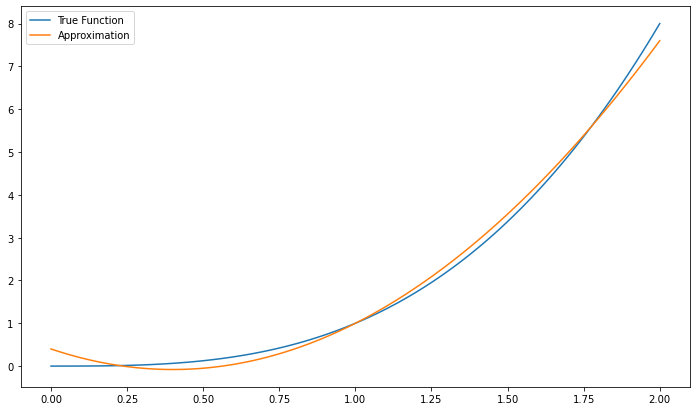

In [ ]:
#function#
f = lambda x: x**3

#derivative#
g = lambda x: x**2

#bases#
phi = [lambda x: x**0,lambda x: x**1,lambda x: x**2]

#derivative of bases#
phi_prime = [lambda x: 0*x**0,lambda x: x**0,lambda x: 2*x**1]

#weight function#
w = lambda x: x**0

#interval#
a = 0
b = 2
c = approx(f,w,phi,a,b)

#approximating actual function#
plot_approx(f,phi,c,w,a,b)

#approximating derivative#
#plot_approx(g,phi_prime,c,w,a,b)


### <center> Chebyshev Polynomials

### <center> Test 1

<ipython-input-4-d0efa643ff3a>:19: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  c[i] = quad(temp,a,b)[0]


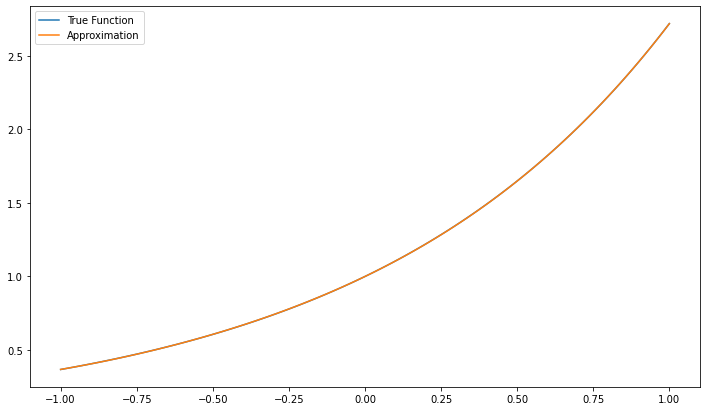

In [ ]:
f = lambda x: np.exp(x)
n = 4
g =Chebyshev_approx(f, n,show_plot=True)

In [ ]:
g

0.0437939235531859*x**4 + 0.177347399355989*x**3 + 0.49919675551532*x**2 + 0.99730765846785*x + 1.00004477866191

### <center> Test 2

In [ ]:
f = lambda x: np.sin(4*x)
n = 100
g =Chebyshev_approx(f, n,show_plot=True)

NameError: name 'Chebyshev_approx' is not defined

In [ ]:
g

x*(4.22677299350887*x**4 - 8.72483803288941*x**2 + 3.7698087476807)

### <center> Test 3

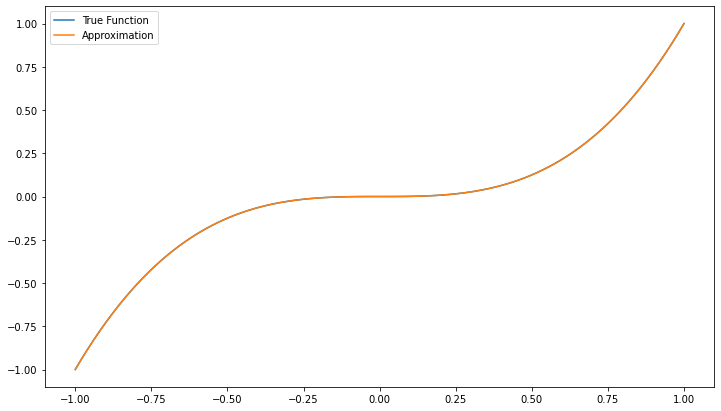

In [ ]:
f = lambda x: x**3
n = 3
g =Chebyshev_approx(f, n,show_plot=True)

In [ ]:
g

x*(0.999999999983144*x**2 + 1.17397203069913e-11)

<ipython-input-5-d0efa643ff3a>:19: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  c[i] = quad(temp,a,b)[0]


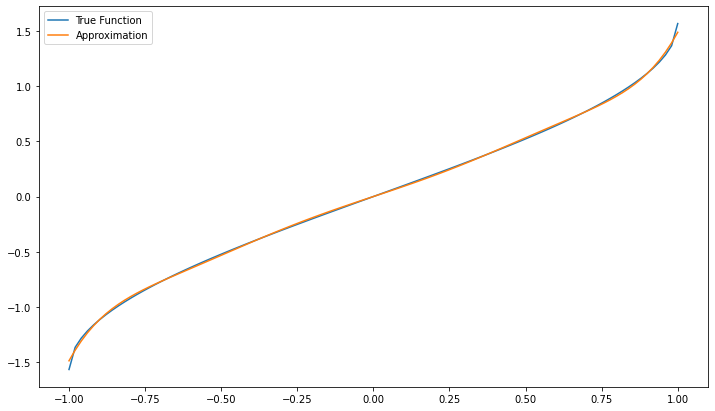

In [ ]:
f = lambda x: np.arcsin(x)
n = 8
g =Chebyshev_approx(f, n,show_plot=True)

In [ ]:
sm.latex(g)
#g

'x \\left(0.565884242085704 x^{2} + 0.848826363170296\\right)'

## <center>Fourier Series

In [ ]:
def get_sym_function(A_0,A_list,B_list,L):
    x = sm.Symbol("x")

    ans = A_0/2

    n = len(A_list)

    for i in range(n):
        temp = A_list[i] * sm.cos(((i+1)*sm.pi*x)/L) + B_list[i] * sm.sin(((i+1)*sm.pi*x)/L)
        ans+= temp

    return sm.simplify(ans)


In [ ]:
def get_fourier_value(A_0,A_list,B_list,L,x):

    ans = A_0/2

    n = len(A_list)

    for i in range(n):
        temp = A_list[i] * np.cos(((i+1)*np.pi*x)/L) + B_list[i] * np.sin(((i+1)*np.pi*x)/L)
        ans+= temp

    return ans

In [ ]:
def fourier(f,n,L,show_error):

    A_list = []
    B_list = []

    #calculating A0#
    A_0 = (1/L) * quad(f,-L,L)[0]

    #calculating An and Bn#
    for i in range(0,n,1):
        c = lambda x: np.cos(((i+1)*np.pi*x)/L)
        s = lambda x: np.sin(((i+1)*np.pi*x)/L)

        temp1 = lambda x: f(x) * c(x)
        temp2 = lambda x: f(x) * s(x)

        A_i = (1/L) * quad(temp1,-L,L)[0]
        B_i = (1/L) * quad(temp2,-L,L)[0]

        A_list.append(A_i)
        B_list.append(B_i)

    #plotting#
    fig,ax = plt.subplots(1,figsize = (12,7))
    t = np.linspace(-L,L,100)

    y_f = f(t)
    y_approx = get_fourier_value(A_0,A_list,B_list,L,t)

    if show_error == True:
        y_error = np.abs(y_f - y_approx)

    ax.plot(t,y_f,label = 'True Function')
    ax.plot(t,y_approx,label = 'approx function')

    if show_error == True:
        ax.plot(t,y_error,label = 'error')

    plt.legend(loc='best')

    return get_sym_function(A_0, A_list, B_list, L)


### <center> Test 1

[-0.9048807163999943, 1.03327595318648, -1.176344931319993, 0.22622017909999848, 0.7172834947073133, -0.5532315271059378, 0.3856868627278664, -0.28036618545659076, 0.2129131097411757, -0.16743831338242446]
[-0.11311008954999925, 0.31793106251891684, -0.8822586984899945, 1.8097614327999891, -0.8966043683841413, 0.3494093855405921, -0.16873800244344175, 0.09544380781500979, -0.059881812114705765, 0.04034658153793376]


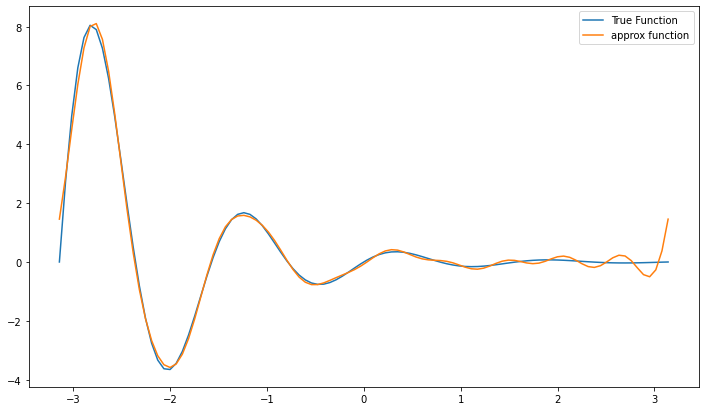

In [ ]:
f = lambda x: np.exp(-x) * np.sin(2*x) * np.cos(2*x)
n = 10
L = np.pi
fourier(f,n,L,show_error=False)

### <center> Test 2

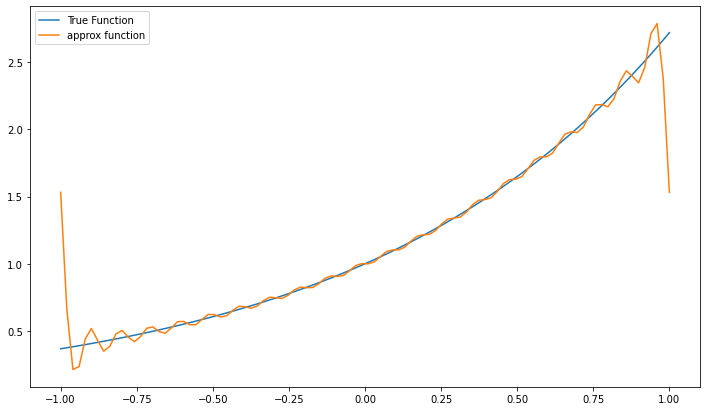

In [ ]:
f = lambda x: np.exp(x)
n = 20
L = 1
fourier(f,n,L,show_error=False)

### <center> Test 3

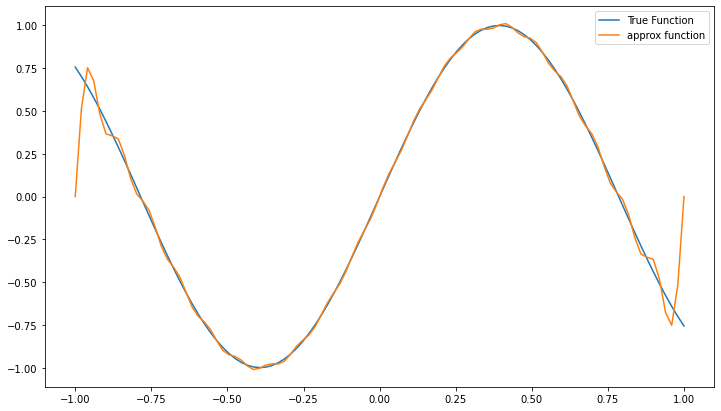

In [ ]:
f = lambda x: np.sin(4*x)
n = 20
L = 1
fourier(f,n,L,show_error=False)

[0.0, 0.0, 0.0]
[2.0000000000000004, -0.9999999999999998, 0.666666666666667]


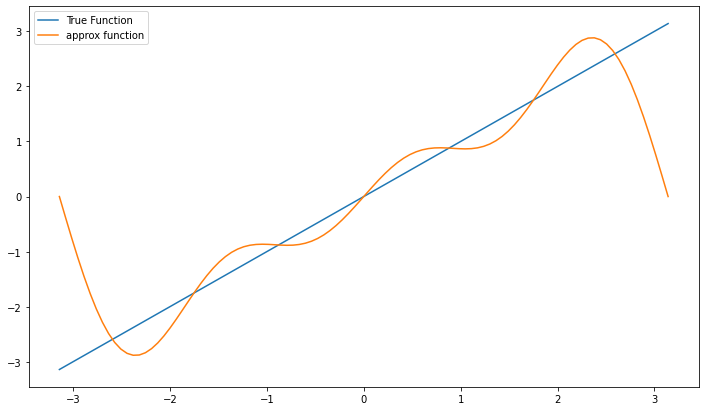

In [ ]:
f = lambda x: x
n = 3
L = np.pi
fourier(f,n,L,show_error=False)

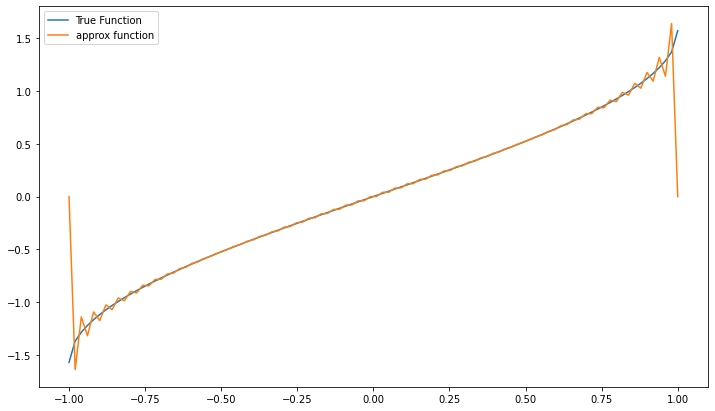

In [ ]:
f = lambda x: np.arcsin(x)
n = 50
L = 1
g = fourier(f,n,L,show_error=False)

In [ ]:
sm.latex(g)

'0.695757822380525 \\sin{\\left(\\pi x \\right)} - 0.389861545730033 \\sin{\\left(2 \\pi x \\right)} + 0.272929515497025 \\sin{\\left(3 \\pi x \\right)} - 0.210623151879466 \\sin{\\left(4 \\pi x \\right)} + 0.171763589577604 \\sin{\\left(5 \\pi x \\right)}'

## <center>Gaussian Quadrature

In [ ]:
def get_c_values(x_roots,w,n,a,b):
    """
        Generates the coeffiecents for gaussian quadrature

        Inputs:
            x_roots:
    """
    x = sm.Symbol('x')

    c_values = []

    for i in range(0,n,1):
        sym_f = w

        for j in range(0,n,1):

            if i!=j:
                sym_f*= (x-x_roots[j])/(x_roots[i]-x_roots[j])

        f = sm.lambdify(x,sym_f)
        c_i = quad(f,a,b)[0]
        c_values.append(c_i)

    return c_values



In [ ]:
def get_gaussian_approx_value(f,x_roots,c_values):
    """
        Approximates the guassian quadrature value
    """

    n = len(c_values)
    ans = 0
    for i in range(0,n,1):
        ans+= c_values[i] * f(x_roots[i])

    return ans

### <center> Gauss-Legendre </center>

<center>recursive definition: </center>


$$ n P_{n}(x) = (2n-1)xP_{n-1}(x) - (n-1)P_{n-2}(x) $$

In [ ]:
def get_legendre(n):
    """
        Generates the nth legendre polynomial
    """

    x = sm.Symbol('x')
    p_0 = 1
    p_1 = x

    p_list = [p_0,p_1]

    for i in range(2,n+1,1):
        p_im1 = p_list[-1]
        p_im2 = p_list[-2]
        p_i = (1/i)*( (2*i -1)*x*p_im1 -(i-1)*p_im2)
        p_list.append(p_i)

    return p_list



In [ ]:
def gauss_legendre(f,n,true_value):
    """
        Approximates the integral of f using gauss-legendre

        f : the integrand
        n : number of partions
    """
    x = sm.Symbol('x')

    #weight function#
    w = x**0

    #getting list of legendre polynomials#
    Legendre = get_legendre(n)
    #getting nth degree polynomial#
    expr = sm.simplify(Legendre[-1])

    #calculating roots#
    poly = sm.Poly(expr,x)
    coeff = poly.all_coeffs()
    x_roots = np.roots(coeff)
    c_values = get_c_values(x_roots,w, n, -1, 1)

    ans = get_gaussian_approx_value(f, x_roots, c_values)

    if true_value!=None:
        error = np.abs(true_value-ans)
        return ans,error

    return ans




### <center> Gauss-Laguerre

$$kL_{k}(x) = (2k-1-x)L_{k-1}(x) - (k-1)L_{k-2}(x)$$

In [ ]:
def get_Laguerre(n):
    """
        Generates 0-nth degree Laguerre Polynomial
    """
    x = sm.Symbol("x")

    L_0 = 1
    L_1 = -x+1

    L_list = [L_0,L_1]

    for i in range(2,n+1,1):
        L_im1 = L_list[-1]
        L_im2 = L_list[-2]
        L_i = (1/i) * ( (2*i-1-x)*L_im1 -(i-1)*L_im2)
        L_list.append(L_i)

    return L_list

In [ ]:
def gauss_laguerre(f,n,true_value):
    """
        Approximates the integral using gauss-laguerre

        f: integrand
        n: number of partions
    """
    x = sm.Symbol("x")
    w = sm.E**(-x)
    Laguerre = get_Laguerre(n)
    expr = sm.simplify(Laguerre[-1])
    poly = sm.Poly(expr,x)
    coeff = poly.all_coeffs()
    x_roots = np.roots(coeff)
    c_values = get_c_values(x_roots,w, n,0,np.inf)
    ans = get_gaussian_approx_value(f, x_roots, c_values)

    if true_value!=None:
        error = np.abs(true_value-ans)
        return ans,error

    return ans



### <center> Gauss - Chebyshev

$$T_{n}(x) = 2 x T_{n-1}(x) - T_{n-2}(x)$$

In [ ]:
def get_cheby(n):
    x = sm.Symbol("x")

    T_0 = 1
    T_1 = x

    T_list = [T_0,T_1]

    for i in range(2,n+1,1):
        T_im1 = T_list[-1]
        T_im2 = T_list[-2]
        T_i = 2*x*T_im1 - T_im2
        T_list.append(T_i)

    return T_list

In [ ]:
def gauss_chebyshev(f,n,true_value):
    """
        Approximates the integral using gauss-chebyshev

        f: integrand
        n: number of partions
    """
    x = sm.Symbol("x")
    Chebyshev = get_cheby(n)
    w = 1/(sm.sqrt(1-x**2))
    expr = sm.simplify(Chebyshev[-1])
    poly = sm.Poly(expr,x)
    coeff = poly.all_coeffs()
    x_roots = np.roots(coeff)
    c_values = get_c_values(x_roots,w, n,-1,1)
    ans = get_gaussian_approx_value(f, x_roots, c_values)

    if true_value!=None:
        error = np.abs(true_value-ans)
        return ans,error

    return ans


### <center> Legendre Examples

#### <center> Example 1

$$I = \int_{0}^{4} t e^{2t}dt$$

transformed:
$$I = \int_{-1}^{1} (4x+4) e ^{4x+4} dx$$

In [ ]:
f = lambda x: (4*x+4)*np.exp(4*x+4)
n = 2
true_value = None
gauss_legendre(f,n,true_value)

3477.5439362670822

#### <center> Example 2

$$I = \int_{0}^{\pi} (\frac{sin(x)}{x})^{2} dx$$

transformed:
$$I = \int_{-1}^{1} \frac{2}{\pi} (\frac{sin(\frac{\pi}{2}(t+1))}{t+1})^{2} dt$$

In [ ]:
f = lambda x: (2/np.pi) * ( (np.sin((np.pi/2)*(x+1)))/(x+1))**2
n = 2
true_value = 1.418151576132629
ans,error = gauss_legendre(f,n,true_value)
print("approximate answer  \n \n",ans,"\n \nerror: \n \n",error)

approximate answer  
 
 1.4503118052804291 
 
error: 
 
 0.032160229147800035


### <center> Laguerre Examples

$$I = \int_{0}^{\infty} (1- x^{2})^{3} e^{-x}$$

In [ ]:
f = lambda x: (1-x**2)**3
n = 6
true_value = -653
ans,error = gauss_laguerre(f, n, true_value)
print("approximate answer  \n \n",ans,"\n \nerror: \n \n",error)

approximate answer  
 
 -652.9999999825585 
 
error: 
 
 1.7441493582737166e-08


<center> Chebyshev Examples

$$\int_{-1}^{1} (1-x^{2})^{\frac{3}{2}} dx$$

In [ ]:
f = lambda x: (1-x**2)**3
n = 6
true_value = 1.178097245096172
ans,error = gauss_chebyshev(f, n, true_value)
print("approximate answer  \n \n",ans,"\n \nerror: \n \n",error)

approximate answer  
 
 0.9817477042467934 
 
error: 
 
 0.1963495408493786


In [ ]:
f = lambda x: (1-x**2)**3
n = 6
true_value = 1.178097245096172
ans,error = gauss_chebyshev(f, n, true_value)
print("approximate answer  \n \n",ans,"\n \nerror: \n \n",error)

# <center>Solving Differential Equations Numerically

### <center> implicit solution:
$$u_{t}= C u_{xx}$$

where :

$$u(0,x) = f(x)$$

$$u(t,a) = L_{1}$$

$$u(t,b) = L_{2}$$

In [ ]:
def plot_pde(u,x_space,t_space,true_f):
    fig = plt.figure()
    plt.rcParams['figure.figsize'] = (16,10)
    ax = plt.axes(projection = '3d')
    X,T = np.meshgrid(x_space,t_space)

    ax.plot_surface(T,X,u,cmap='plasma',label='approx')

    if true_f!=None:
        true_values = true_f(X,T)
        ax.plot_surface(T,X,true_values,label = 'true function')

    ax.set_xlabel('$t$')
    ax.set_ylabel('$x$')
    ax.set_zlabel('$u(x,y)$')


In [ ]:
def solve_parabolic_PDE(C,f,a,b,L1,L2,t1,t2,delta_t,delta_x,true_f):
    """
        Solves parabolic partial differential equation
    """

    #getting stepsizes#
    n_x = int(np.round((b-a)/delta_x))
    n_t = int(np.round((t2-t1)/delta_t))
    ratio = C*(delta_t/(delta_x**2))

    u = np.zeros((n_t+1,n_x+1))

    #setting u(x,0) = f(x)#
    for i in range(0,n_x+1,1):
        x_i = a + i*delta_x
        u[0,i] = f(x_i)


    #setting u(a,t) = alpha , u(b,t) = beta#
    for j in range(0,n_t+1,1):
        u[j,0] = L1
        u[j,n_x] = L2


    #calculating points inbetween#
    for j in range(1,n_t+1,1):
        for i in range(1,n_x,1):
            u[j,i] = (1-2*ratio)*u[j-1,i] + ratio*(u[j-1,i+1] + u[j-1,i-1])

    #plotting#
    t_space = np.linspace(t1,t2,n_t+1)
    x_space = np.linspace(a,b,n_x+1)
    plot_pde(u,x_space,t_space,true_f)

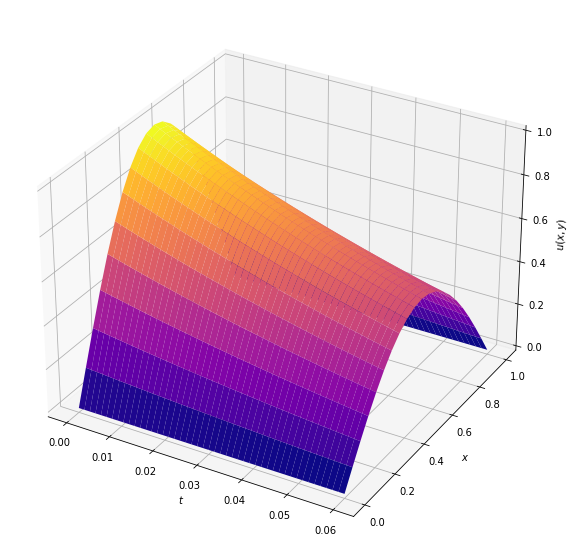

In [ ]:
solve_parabolic_PDE(C=1,f= lambda x: np.sin(np.pi * x),a = 0,b=1,L1=0,L2=0,t1=0,t2=0.06,delta_t=0.0013,delta_x=0.05,true_f=None)

## <center> solving second order ODE with BVP

assuming the form : $$y''(x) = p(x) y'(x) + q(x) y(x) + r(x)$$
subject to : $$y(a) = \alpha$$
$$y(b) = \beta$$

using central difference approximation the following relation is obtained:
$$[2+p(x_{i}) h] y_{i-1} - [4+2 q(x_{i})h^{2}]y_{i} + [2-p(x_{i})h]y_{i+1} = 2 r(x_{i}) h^{2}$$

where:
$$h = \frac{b-a}{N}$$
$$y_{i} = y(x_{i})$$

In [ ]:
def plot_bvp(x_values,y_values,f):
    fig,ax = plt.subplots(1,figsize = (12,7))
    ax.plot(x_values,y_values,label = 'Approx')

    if(f!=None):
        ax.plot(x_values,f(x_values),label = 'true Solution')

    plt.legend(loc='best')

In [ ]:
def solve_2nd_ODE(p,q,r,a,b,alpha,beta,N,true_f):

    #set of x_values#
    x_values = [a]

    #getting stepsize#
    h = (b-a)/N


    #setting boundary values#
    y_a = alpha
    y_b = beta

    #getting system of equations form#
    A = np.zeros((N-1,N-1))
    c = np.zeros((N-1,1))

    #setting first zero#
    x_i = a+1*h
    x_values.append(x_i)
    A[0,0] = -(4+2*q(x_i)*(h**2))
    A[0,1] = 2-p(x_i)*h
    c[0,0] = 2*r(x_i)*(h**2) -(2+p(x_i)*h)*alpha

    #inbetween#
    for i in range(1,N-2,1):

        x_i = a + (i+1)*h
        x_values.append(x_i)

        A[i,i-1] = 2+p(x_i)*h
        A[i,i] = -(4+2*q(x_i)*(h**2))
        A[i,i+1] = 2-p(x_i)*h
        c[i,0] = 2*r(x_i)*(h**2)

    #last equation#
    x_i = a + (N-1)*h
    x_values.append(x_i)
    A[N-2,N-3] = 2+p(x_i)*h
    A[N-2,N-2] = -(4+2*q(x_i)*(h**2))
    c[N-2,0] = 2*r(x_i)*(h**2) - (2-p(x_i)*h)*beta

    y_values = LA.inv(A) @ c

    #appending first and last value#
    x_values.append(b)
    y_values = np.insert(y_values,0,alpha)
    y_values = np.insert(y_values,N,beta)
    x_values = np.array(x_values)

    plot_bvp(x_values,y_values,true_f)

### <center> Test 1:
$$y''+3y'-2y = 2x+3$$
subject to : $$y(0) = 2,y(1) = 1$$

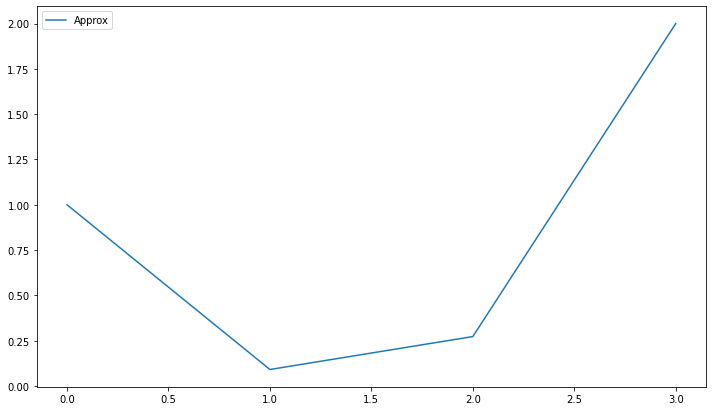

In [ ]:
p = lambda x: 0*x
q = lambda x: x
r = lambda x: x**0
a = 0
b = 3
alpha = 1
beta = 2
N = 3
# C2 = (5 - 5*np.exp((-3+np.sqrt(17))/2 )) / (np.exp((-3-np.sqrt(17))/2) - np.exp((-3+np.sqrt(17))/2))
# C1 = 5-C2
#f = lambda x: C1*np.exp(((-3+np.sqrt(17))/2)*x) + C2*np.exp(((-3-np.sqrt(17))/2)*x)
f = None
solve_2nd_ODE(p,q,r,a,b,alpha,beta,N,f)

In [ ]:
p = lambda x: -3 *(x**0)
q = lambda x: 2 * (x**0)
r = lambda x: 2*x + 3
a = 0
b = 1
alpha = 2
beta = 1
N = 20
C2 = (5 - 5*np.exp((-3+np.sqrt(17))/2 )) / (np.exp((-3-np.sqrt(17))/2) - np.exp((-3+np.sqrt(17))/2))
C1 = 5-C2
#f = lambda x: C1*np.exp(((-3+np.sqrt(17))/2)*x) + C2*np.exp(((-3-np.sqrt(17))/2)*x)
f = None
solve_2nd_ODE(p,q,r,a,b,alpha,beta,N,f)

In [ ]:
np.exp(1)

2.718281828459045